In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
housing_data = pd.read_csv('datasets/kaggle-california-housing.csv')
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13694,-117.23,34.13,10.0,1145.0,293.0,726.0,251.0,1.6450,68700.0,INLAND
1805,-122.33,37.93,27.0,2158.0,424.0,1220.0,442.0,3.0156,111500.0,NEAR BAY
9896,-122.26,38.29,10.0,969.0,160.0,482.0,180.0,6.5799,218100.0,NEAR BAY
3172,-119.55,36.37,26.0,1912.0,339.0,1002.0,311.0,3.0375,126300.0,INLAND
11469,-118.05,33.65,5.0,7017.0,935.0,2427.0,867.0,10.1154,477700.0,NEAR OCEAN


In [3]:
#remove records with missing values, #not working
housing_data.dropna(inplace=True)
housing_data.shape

(20433, 10)

In [4]:
housing_data.loc[housing_data['median_house_value'] == 500001].count()

longitude             958
latitude              958
housing_median_age    958
total_rooms           958
total_bedrooms        958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

In [5]:
#cap on median house value being 500001 skews the dataset, best to drop these rows
housing_data = housing_data.drop(housing_data.loc[housing_data['median_house_value'] == 500001].index)
housing_data.shape

(19475, 10)

In [6]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [8]:
#convert ocean proximity strings to numeric one-hot form
housing_data = pd.get_dummies(housing_data, columns=['ocean_proximity'])
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [9]:
X = housing_data.drop('median_house_value', axis = 1)
Y = housing_data['median_house_value']

In [10]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [13]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15580, 13), (3895, 13), (15580,), (3895,))

In [14]:
from sklearn.linear_model import LinearRegression
#normalize no longer a valid parameter, doesn't work
#linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [15]:
#my own code to deal witth normalize parameter error
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#x_train = scaler.fit_transform(x_train)
#x_test = scaler.transform(x_test)
#linear_model = LinearRegression().fit(x_train, y_train)

In [16]:
#my own code to deal witth normalize parameter error
#from sklearn.preprocessing import normalize
#x_train=normalize(x_train, axis=1, copy=True, return_norm=True)
#x_test=normalize(x_test, axis=1, copy=True, return_norm=True)
#x_train.shape

In [17]:
linear_model = LinearRegression().fit(x_train, y_train)

In [19]:
#R square training score, how well model captures underlying variation in training data
#The model captured 61% of variation in training data
print("Training Score: ", linear_model.score(x_train, y_train))

Training Score:  0.6098771820451856


In [20]:
predictors = x_train.columns
predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [22]:
#coefficients aka weights are a measure of how much each variable contributed to the predictions 
#negative values are features which LOWER the price. of a house, positive values RAISE the price
#Most expensive homes are located on Islands
coef = pd.Series(linear_model.coef_, predictors).sort_values()
print(coef)

ocean_proximity_INLAND        -56349.825483
longitude                     -24157.180587
ocean_proximity_NEAR BAY      -23316.248929
latitude                      -22278.401728
ocean_proximity_<1H OCEAN     -17683.666033
ocean_proximity_NEAR OCEAN    -12686.890439
population                       -28.325282
total_rooms                       -7.395178
households                        40.316867
total_bedrooms                    91.142923
housing_median_age               924.999932
median_income                  38361.397608
ocean_proximity_ISLAND        110036.630885
dtype: float64


In [24]:
y_pred = linear_model.predict(x_test)

In [25]:
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})
df_pred_actual.head()

,predicted,actual
11462,253621.361606,282200.0
1192,81426.120396,61300.0
10875,174439.249725,183500.0
8705,275517.168813,331900.0
9096,178011.912859,148900.0


In [26]:
from sklearn.metrics import r2_score
print("R2 Score: ", r2_score(y_test, y_pred))

R2 Score:  0.6239453079200739


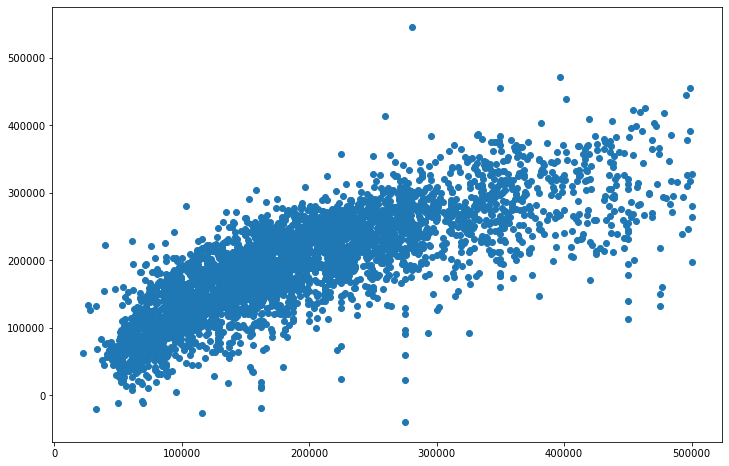

In [28]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(y_test,y_pred)
plt.show()

In [30]:
df_pred_actual_sample = df_pred_actual.sample(100)
df_pred_actual_sample = df_pred_actual_sample.reset_index()
df_pred_actual_sample.head()

,index,predicted,actual
0,6054,257156.238140,227900.0
1,6314,266490.206763,262100.0
2,19329,176169.092275,249200.0
3,18721,70848.097676,78700.0
4,6434,142341.465306,212200.0


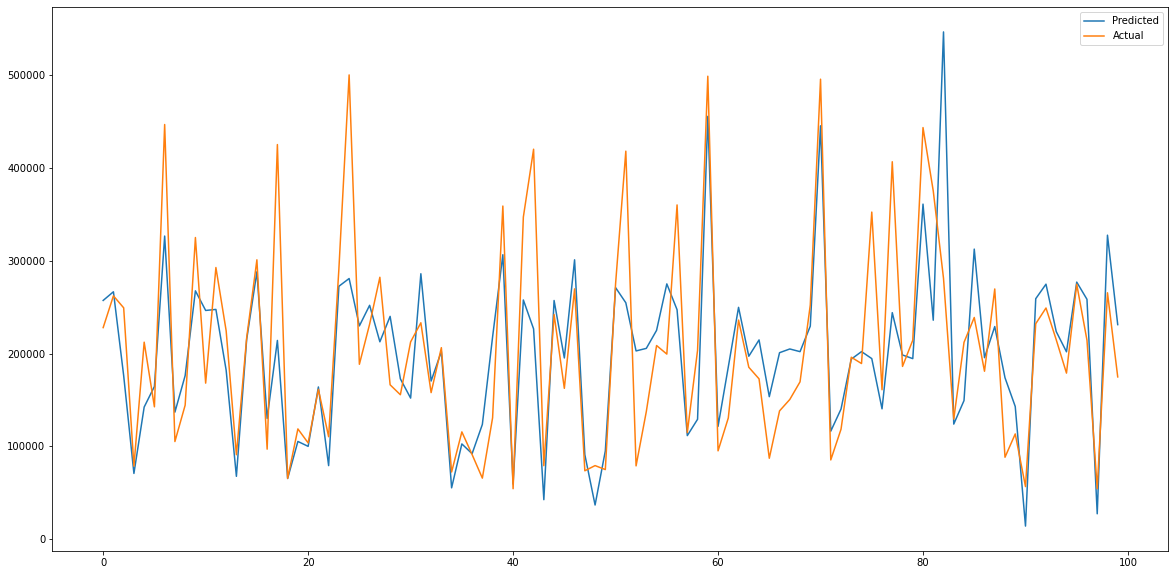

In [31]:
plt.figure(figsize = (20,10))
plt.plot(df_pred_actual_sample['predicted'],label="Predicted")
plt.plot(df_pred_actual_sample['actual'],label="Actual")
plt.y_label= 'median_house_value'
plt.legend()
plt.show()